In [2]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

from scenarios_plots import get_data_wc

import h5py

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# P_2016_cutoff_2020_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2020_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2025_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2025_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2030_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2030_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2035_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2035_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2040_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2040_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2045_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2045_cutoff_to_hist1985_2100.mat', 'r')
# P_2016_cutoff_2050_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2050_cutoff_to_hist1985_2100.mat', 'r')

# P_2016_cutoff1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_2016_cutoff1985_2100.mat', 'r')

# P_2016_cutoff_to_0_2050_1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/96ts_P_gradual_increase_2050_cutoff1985_2100.mat', 'r')

# P_2016_pulse1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/48ts_P_2016_pulse1985_2100.mat', 'r')
# P_2016_increse1985_2100 = h5py.File('/Volumes/photo_video/Scenarios/48ts_P_gradual_increase1985_2100.mat', 'r')
# hist20y = h5py.File('/Volumes/photo_video/Scenarios/48ts_T_only_full_scen_base_historical_20y1985_2100.mat', 'r')

P_gradual_increase_2015_cutoff_to_02000_2030 = h5py.File('/Volumes/Backups/Scenarios/96ts_P_gradual_increase_2015_cutoff_to_0_2000_2099.mat', 'r')

In [4]:
days = len(np.array(P_gradual_increase_2015_cutoff_to_02000_2030['MyLake_results']['basin1']['concentrations']['C'])[:,8])

In [5]:
# scenarios = [P_2016_cutoff1985_2100, P_2016_pulse1985_2100, P_2016_cutoff_to_0_2050_1985_2100, P_2016_cutoff1985_2100, P_2016_cutoff_2020_1985_2100, P_2016_cutoff_2025_1985_2100, P_2016_cutoff_2030_1985_2100, P_2016_cutoff_2035_1985_2100, P_2016_cutoff_2040_1985_2100, P_2016_cutoff_2045_1985_2100, P_2016_cutoff_2050_1985_2100, hist20y]
scenarios = [P_gradual_increase_2015_cutoff_to_02000_2030]

In [6]:
# names_scen = ['P 2016 increse1985 2100', 'P 2016 pulse1985 2100', 'P 2016 cutoff to 0 2050 1985-2100', 'P 2016 cutoff to 0 2015 1985 2100', 'P 2016 cutoff 2020 1985 2100', 'P 2016 cutoff 2025 1985 2100', 'P 2016 cutoff 2030 1985 2100', 'P 2016 cutoff 2035 1985 2100', 'P 2016 cutoff 2040 1985 2100', 'P 2016 cutoff 2045 1985 2100', 'P 2016 cutoff 2050 1985 2100', 'hist20y']
# names_scen = ['P 2016 increse1985 2100', 'P 2016 pulse1985 2100', 'P 2016 cutoff to 0 2050 1985-2100', 'P 2016 cutoff to 0 2015 1985 2100', 'P 2016 cutoff 2020 1985 2100', 'P 2016 cutoff 2025 1985 2100', 'P 2016 cutoff 2030 1985 2100', 'P 2016 cutoff 2035 1985 2100', 'P 2016 cutoff 2040 1985 2100', 'P 2016 cutoff 2045 1985 2100', 'P 2016 cutoff 2050 1985 2100', 'hist20y']
names_scen = ['P 2016 cutoff']

In [7]:
date = datetime(2000, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [8]:
P_fx = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios ,names_scen):
    P_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
#     P_fx[n] = res.env_getter('sediment')['sediment_transport_fluxes'][0, 0]['PO4'][0][0][0] + res.env_getter('sediment')['Bioirrigation_fx_zt'][0, 0]['PO4'][0][0][0]
    
P_fx['Year'] = P_fx.Date.dt.year
P_fx['Month'] = P_fx.Date.dt.month
P_fx['Day'] = P_fx.Date.dt.day
P_fx['DOY'] = P_fx.Date.dt.dayofyear
P_fx['WOY'] = P_fx.Date.dt.weekofyear

In [9]:
Phy = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    Phy[n] = np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8] + np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,8]
    
Phy['Year'] = Phy.Date.dt.year
Phy['Month'] = Phy.Date.dt.month
Phy['Day'] = Phy.Date.dt.day
Phy['DOY'] = Phy.Date.dt.dayofyear
Phy['WOY'] = Phy.Date.dt.weekofyear
# Phy = Phy[-365*55:]

In [10]:
PO4_4m = pd.DataFrame({'Date': ds})

for res, n in zip(scenarios,names_scen):
    PO4_4m[n] = np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,8]
    
PO4_4m['Year'] = PO4_4m.Date.dt.year
PO4_4m['Month'] = PO4_4m.Date.dt.month
PO4_4m['Day'] = PO4_4m.Date.dt.day
PO4_4m['DOY'] = PO4_4m.Date.dt.dayofyear
PO4_4m['WOY'] = PO4_4m.Date.dt.weekofyear

Text(0,0.5,'P flux, $mg/m^2/d$')

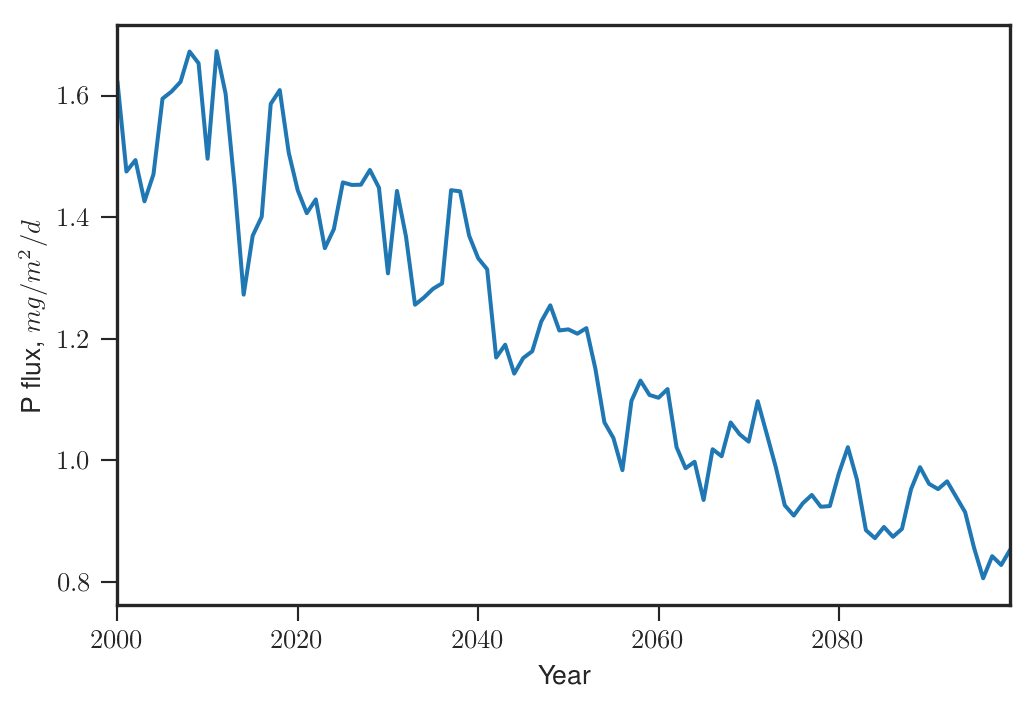

In [11]:
ax = P_fx[P_fx.Year>1999].groupby(['Year']).mean()[names_scen].plot()
ax.legend_.remove()
plt.ylabel('P flux, $mg/m^2/d$')
# ax.grid()

Text(0,0.5,'Phytoplankton, ug-P/L')

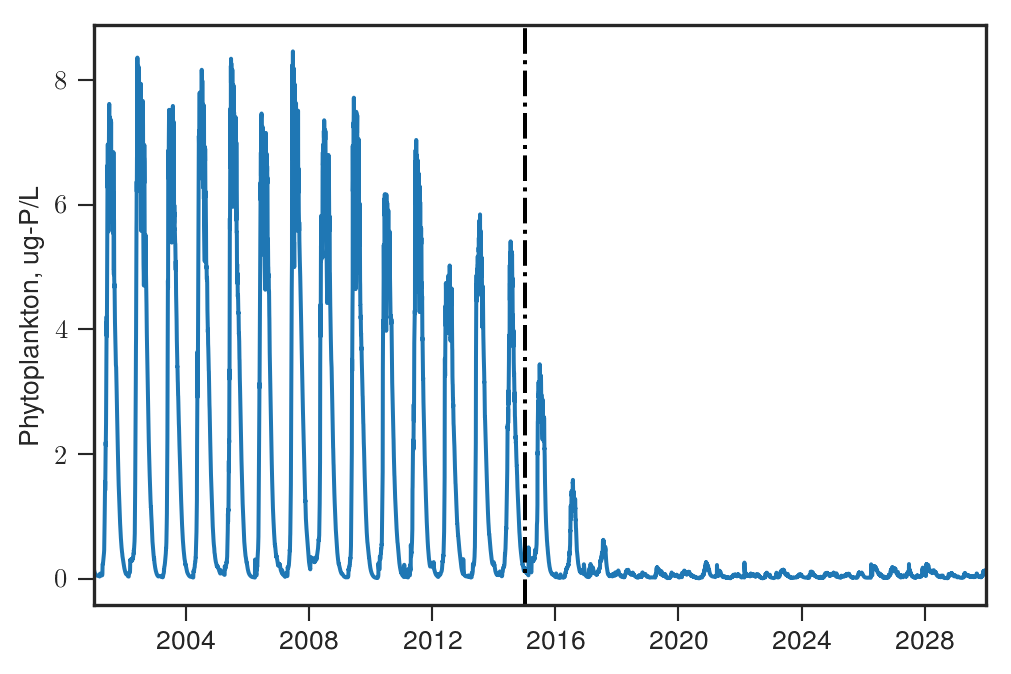

In [12]:
plt.plot(ds, Phy[names_scen].values)
plt.xlim(datetime(2001, 1, 1),datetime(2030, 1, 1))
plt.axvline(datetime(2015, 1, 1), c='k',linestyle='-.')
plt.ylabel('Phytoplankton, ug-P/L')

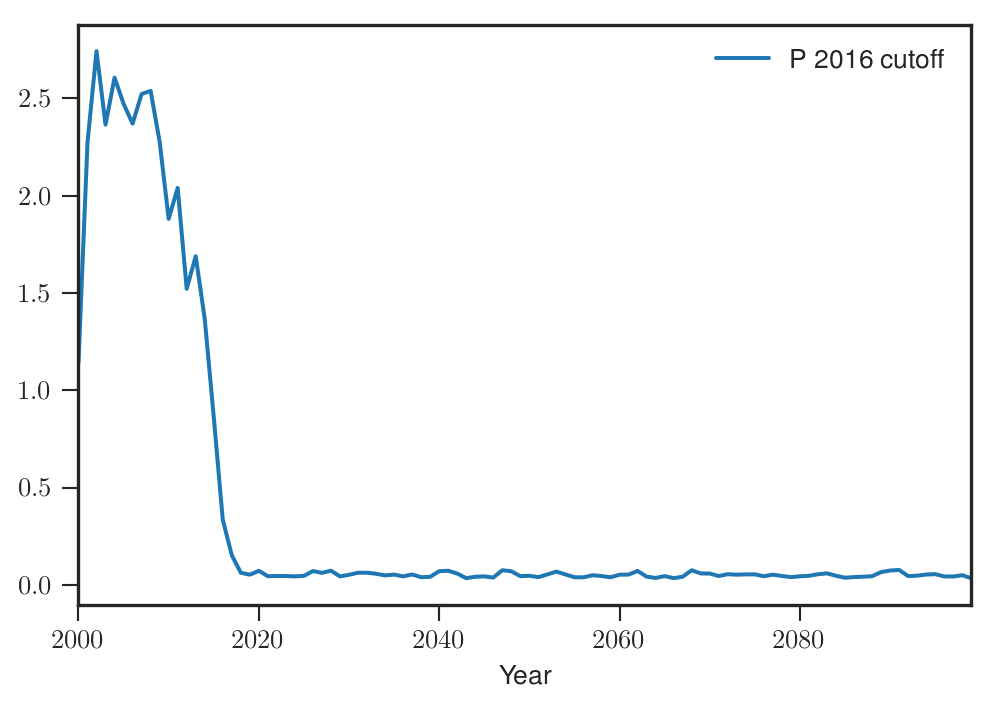

In [13]:
Phy.groupby('Year').mean()[names_scen].plot()

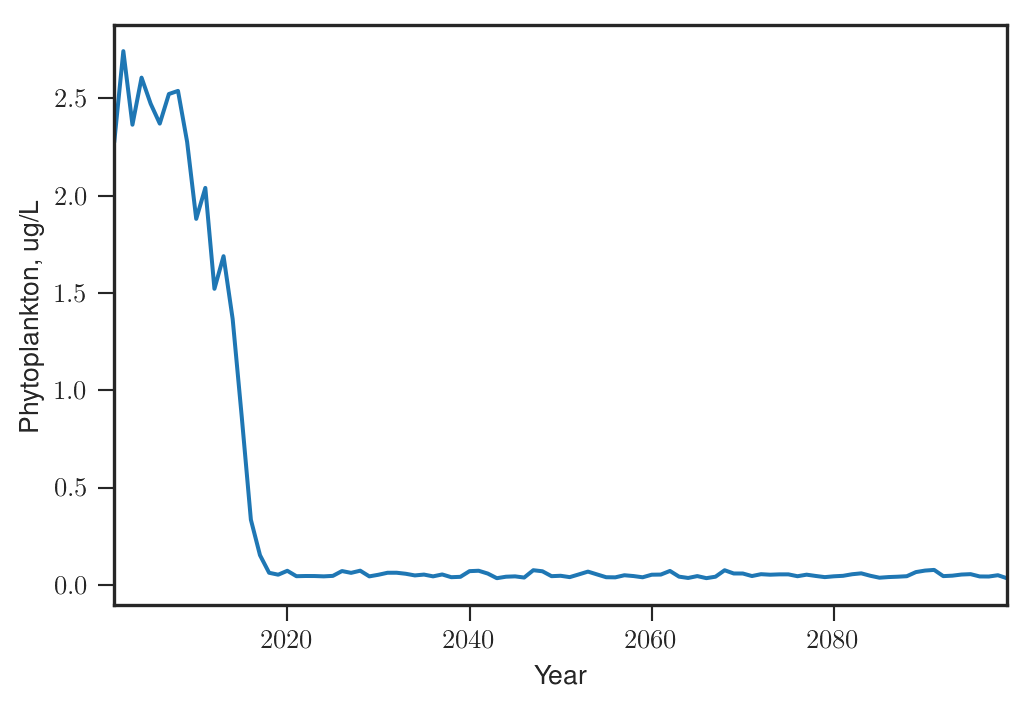

In [14]:
ax = Phy[Phy.Year>2000].groupby(['Year']).mean()[names_scen].plot()
plt.ylabel('Phytoplankton, ug/L')
ax.legend_.remove()

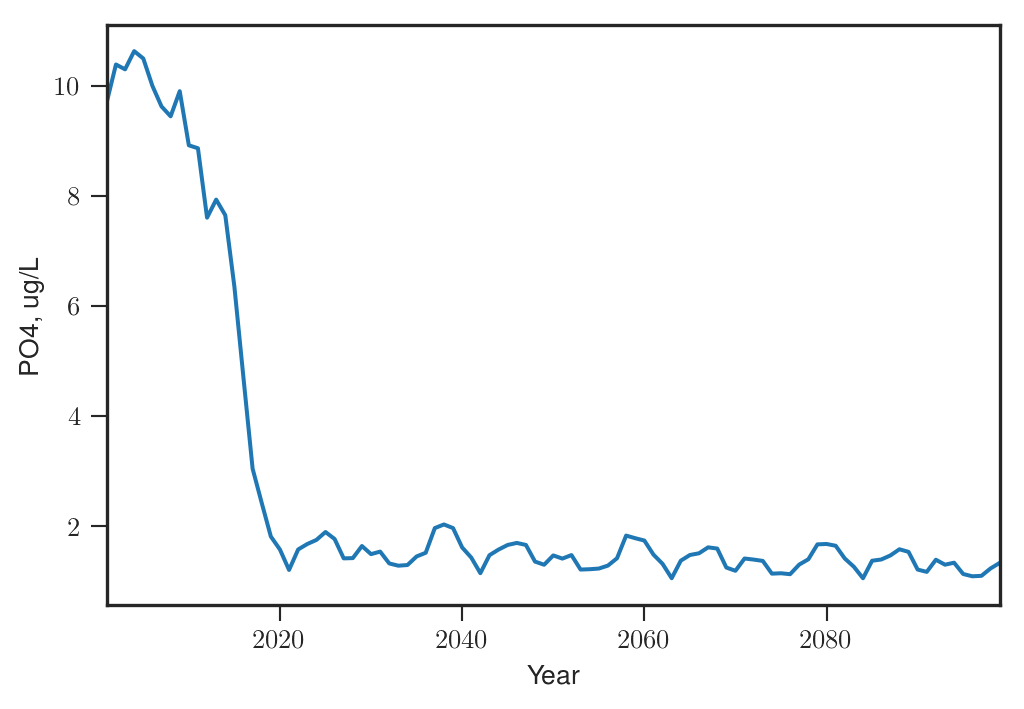

In [15]:
ax = PO4_4m[(PO4_4m.Year>2000) & (PO4_4m.Year<2100)].groupby(['Year']).mean()[names_scen].plot()
plt.ylabel('PO4, ug/L')
ax.legend_.remove()

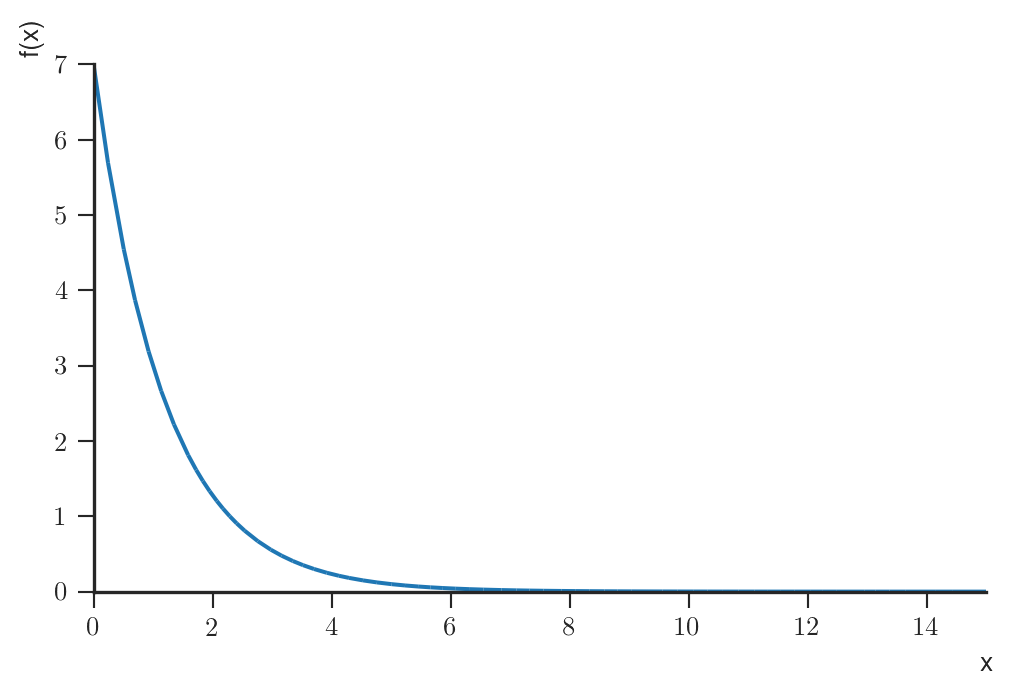

In [16]:
from sympy import symbols, exp
from sympy.plotting import plot

x = symbols('x')
plot(7*exp(-x*0.85), (x, 0, 15))

In [17]:
tau = 0.85
w = tau

In [18]:
po4_measured = PO4_4m[(PO4_4m.Year>2014) & (PO4_4m.Year<2099)].groupby(['Year']).mean()[names_scen].values
phy_measured = Phy[(Phy.Year>2014) & (Phy.Year<2099)].groupby(['Year']).mean()[names_scen].values
p_fx_measured = P_fx[(P_fx.Year>2014) & (P_fx.Year<2099)].groupby(['Year']).mean()[names_scen].values

In [19]:
names_scen

['P 2016 cutoff']

In [20]:
po4_model = {}
for y,s in zip([2050, 2015, 2021,2025,2030,2035,2040,2045,2050],names_scen[2:-1]):
    po4_model[s] = PO4_4m[(PO4_4m.Year>(y-1)) & (PO4_4m.Year<(y+16))].groupby(['Year'])[s].mean().values

In [21]:
PO4_4m[names_scen[-1]].mean()

2.709227397541442

In [22]:
x = np.linspace(0, 15, 100)

for s in names_scen[4:-1]:
    plt.figure()
    plt.plot(x, (po4_model[s][0]-PO4_4m[names_scen[-1]].mean())*np.exp(-x/tau)+PO4_4m[names_scen[-1]].mean(), ':')
    plt.plot(po4_model[s], label=s)
    plt.legend()

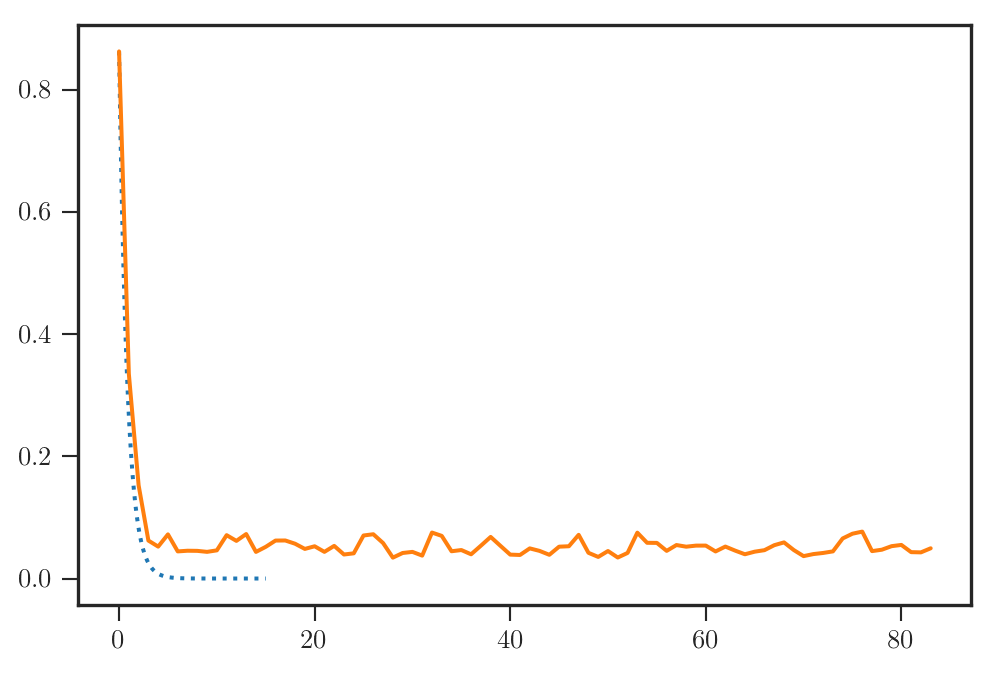

In [23]:
x = np.linspace(0, 15, 100)

plt.plot(x, phy_measured[0]*np.exp(-x/tau), ':')
plt.plot(phy_measured)

In [24]:
tau = 0.85
w = tau

In [25]:
np.argmax(((p_fx_measured[0])*np.exp(-x/tau/140) < (p_fx_measured[0])/2))

0

In [26]:
p_fx_measured[0][0]/2

0.6848118226194138

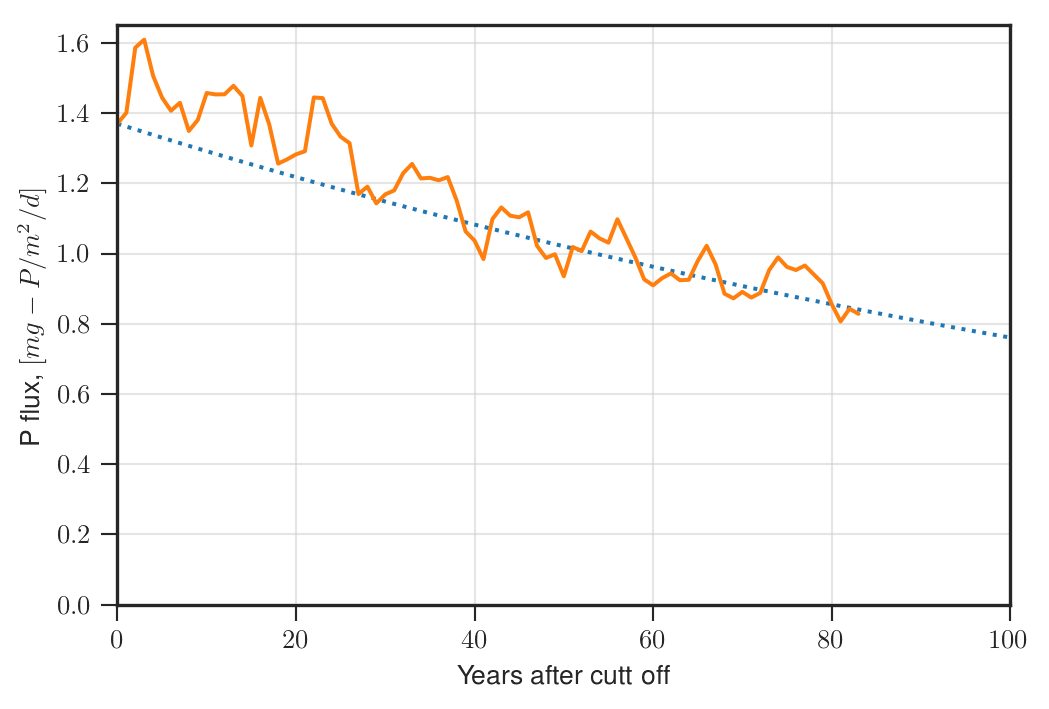

In [41]:
x = np.linspace(0, 100, 100)

plt.plot(x, (p_fx_measured[0])*np.exp(-x/tau/200), ':')
# plt.plot(x, (p_fx_measured[0])*np.exp(-x/tau), ':')
plt.plot(p_fx_measured)
plt.ylim(0,None)
# plt.axvline(82, ymin=0,ymax=0.46, c='k', linestyle='-.')
# plt.axhline(p_fx_measured[0][0]/2, xmin=0,xmax=0.82, c='k', linestyle='-.')
plt.ylabel('P flux, $[mg-P/m^2/d]$')
plt.xlim(0,100)
plt.grid(alpha=0.5)
plt.xlabel('Years after cutt off')
plt.savefig('P_flux_from_sediment.png')

In [28]:
# P_2016_cutoff1985_2100.close()
# P_2016_pulse1985_2100.close() 
# P_2016_increse1985_2100.close()
# hist20y.close()

In [29]:
po4_model

{}

In [30]:
po4_model

{}

In [31]:
x = np.linspace(0, 15, 100)

for s in names_scen:
    plt.figure()
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/2), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/4), ':')
    plt.plot(po4_model[s], label=s)
    plt.ylabel('Phosphate, ug/L')
    plt.xlabel('Years after cut off')
    plt.legend([r'$e^{-t/\tau}$',r'$e^{-t/2\tau}$', r'$e^{-t/4\tau}$','Actual concentration in lake'])

KeyError: 'P 2016 cutoff'

In [ ]:
po4_model = {}
for y,s in zip([2015],names_scen):
    po4_model[s] = PO4_4m[(PO4_4m.Year>(y-1)) & (PO4_4m.Year<(y+16))].groupby(['Year'])[s].mean().values

In [ ]:
x = np.linspace(0, 15, 100)

for s in names_scen:
    plt.figure()
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/4), ':')
    plt.plot(x, (po4_model[s][0])*np.exp(-x/tau/8), ':')
    plt.plot(po4_model[s], label=s)
    plt.ylabel('Phosphate, ug/L')
    plt.xlabel('Years after cut off')
    plt.legend([r'$e^{-t/\tau}$',r'$e^{-t/4\tau}$', r'$e^{-t/8\tau}$','Actual concentration in lake'])

In [ ]:
plt.plot(np.linspace(2001,2031,31), np.log(P_fx.groupby('Year').mean()[names_scen].values))
plt.xlim(2015,2031)
# plt.ylim(0,6.5)
plt.ylabel('P flux, $mg-P/m^2/d$')

In [ ]:
len(x)

In [ ]:
len(po4_measured)

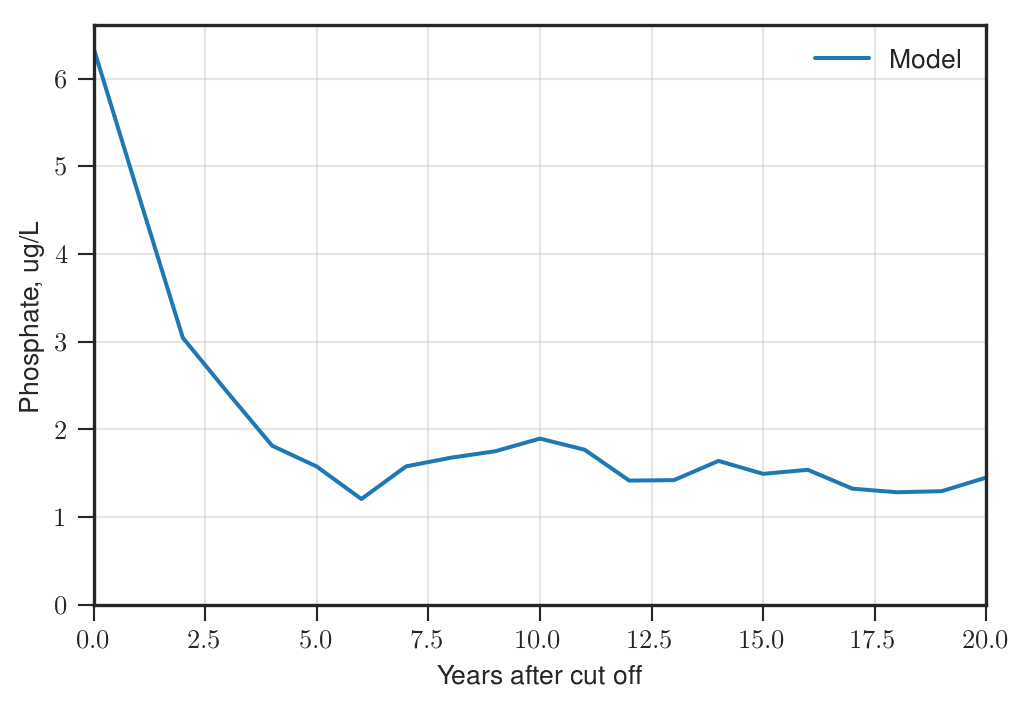

In [44]:
plt.plot(po4_measured)
x = np.linspace(0, len(po4_measured), len(po4_measured))
# plt.plot(x, (po4_measured[0])*np.exp(-x/tau), ':')
# plt.plot(x, (po4_measured[0])*np.exp(-x/tau/2), ':')
# plt.plot(x, (po4_measured[0])*np.exp(-x/tau/4), ':')
plt.xlim(0,20)
plt.ylim(0,None)
plt.grid(alpha=0.5)

plt.ylabel('Phosphate, ug/L')
plt.xlabel('Years after cut off')
plt.legend(['Model',  r'$e^{-t/\tau}$',r'$e^{-t/2\tau}$', r'$e^{-t/4\tau}$'])

In [ ]:
x

In [ ]:
P_gradual_increase_2015_cutoff_to_02000_2030.close()

In [39]:
P_gradual_increase_2015_cutoff_to_02000_2030.close()